In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
train=pd.read_excel("train.xlsx")
test=pd.read_excel("test.xlsx")

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#Exploratory data analysis

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
total = train.isnull().sum().sort_values(ascending=False)
percent_1 = (train.isnull().sum() / train.isnull().count() * 100)
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
print(missing_data)

             Total     %
Cabin          687  77.1
Age            177  19.9
Embarked         2   0.2
PassengerId      0   0.0
Survived         0   0.0
Pclass           0   0.0
Name             0   0.0
Sex              0   0.0
SibSp            0   0.0
Parch            0   0.0
Ticket           0   0.0
Fare             0   0.0



In the train dataset, the 'Cabin' feature exhibits the highest number of missing values, with 687 instances, accounting for approximately 77% of the total entries. Given this substantial percentage of missing data, it is advisable to consider excluding the 'Cabin' feature from the analysis to prevent potential distortion of the results.

Regarding the 'Age' feature, there are 177 missing values, presenting a challenge in handling this variable.

In contrast, the 'Embarked' feature displays a relatively low number of missing values, with only 2 instances. These gaps can be reasonably addressed through appropriate imputation techniques

In [16]:
train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)


Based on general intuition, 'PassengerId', 'Name', and 'Ticket' do not seem to have a significant correlation with the survival rate. Dropping these columns may lead to improved results.

# Data Visualization

In [17]:
f=20

In [18]:
plt.rcParams.update({'font.size': f})

In [19]:
sns.set(font_scale=1.8)

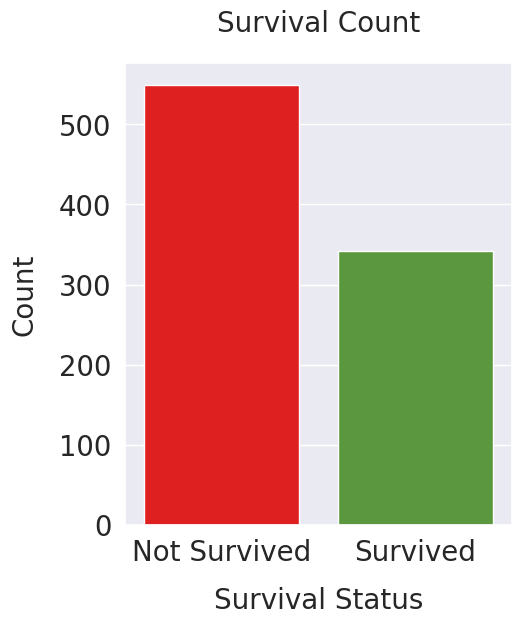

In [20]:
plt.figure(figsize=(5,6))
# visualizing survival counts
custom_colors = ['red',"#55a630"]
sns.countplot(x='Survived', data=train, palette = custom_colors)

plt.title('Survival Count',fontsize=f,y=1.05)
plt.xlabel('Survival Status',labelpad = 15,fontsize =f)
plt.ylabel('Count',labelpad = 15,fontsize = f)

#set custom x-axis labels
plt.xticks([0,1],['Not Survived','Survived'],fontsize=f)

plt.show()

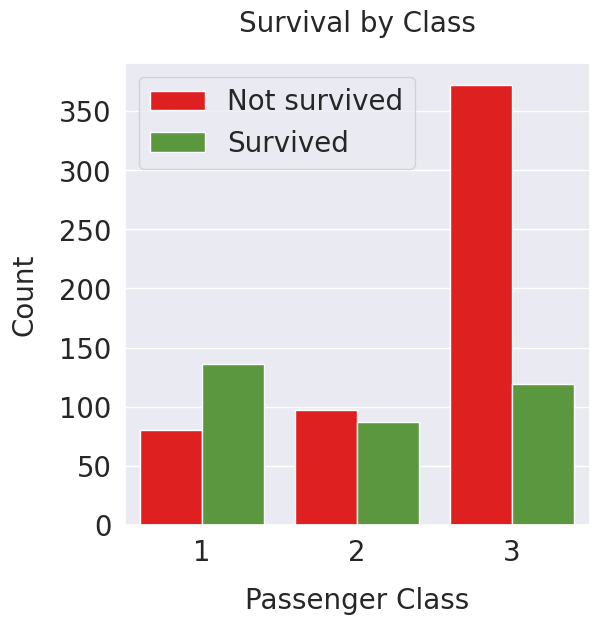

In [21]:
plt.figure(figsize=(6, 6))
ax=sns.countplot(x='Pclass',hue='Survived',data = train, palette = ['red',"#55a630"])

plt.title('Survival by Class',fontsize=f,y=1.05)
plt.xlabel('Passenger Class',labelpad = 15,fontsize =f)
plt.ylabel('Count',labelpad = 15,fontsize = f)

plt.legend(labels=['Not survived', 'Survived'],fontsize=f)
plt.show()

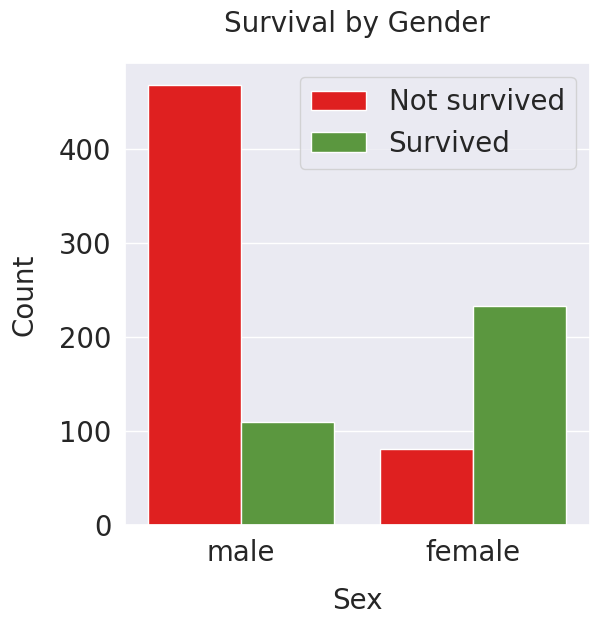

In [22]:
plt.figure(figsize=(6, 6))
#Survival by sex
sns.countplot(x='Sex',hue='Survived',data= train,palette = ['red',"#55a630"])
plt.title('Survival by Gender',fontsize=f,y=1.05)
plt.xlabel('Sex',labelpad = 15,fontsize =f)
plt.ylabel('Count',labelpad = 15,fontsize = f)

#set custom x-axis labels
plt.legend(labels=['Not survived', 'Survived'],fontsize=f)
plt.show()

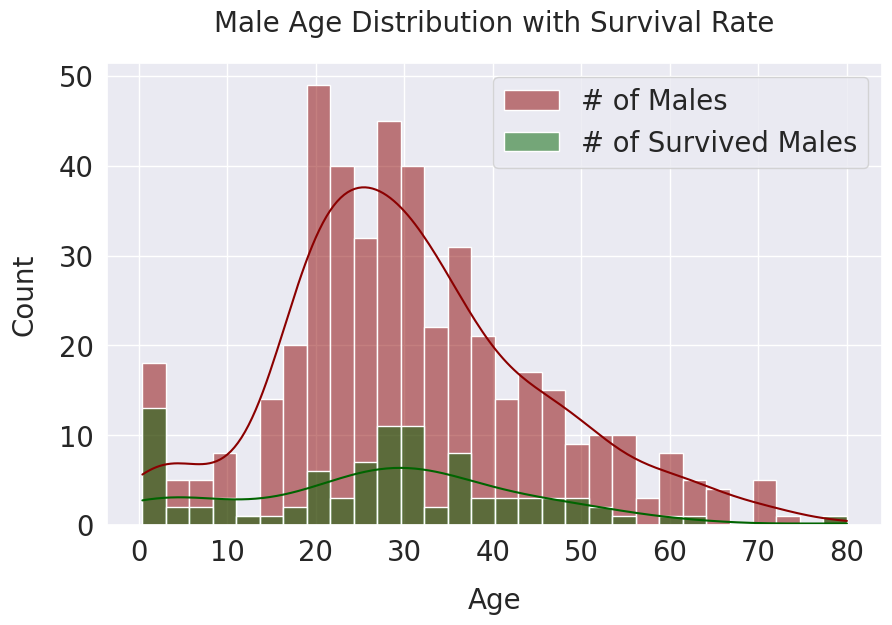

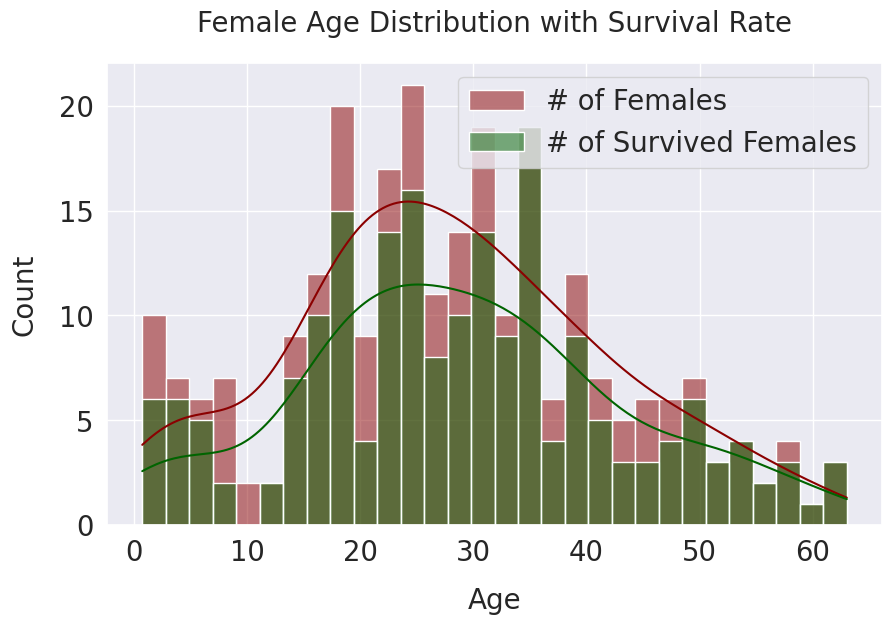

In [23]:
custom_colors = ["#55a630", "#8b0000"]

# Male Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train[train['Sex'] == 'male']['Age'].dropna(), kde=True, color='darkred', bins=30, label='# of Males')
sns.histplot(train[(train['Sex'] == 'male') & (train['Survived'] == 1)]['Age'].dropna(), kde=True, color='darkgreen', bins=30, label='# of Survived Males')
plt.title('Male Age Distribution with Survival Rate', fontsize=f, y=1.05)
plt.xlabel('Age', labelpad=15, fontsize=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.legend()
plt.show()

# Female Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train[train['Sex'] == 'female']['Age'].dropna(), kde=True, color='darkred', bins=30, label='# of Females')
sns.histplot(train[(train['Sex'] == 'female') & (train['Survived'] == 1)]['Age'].dropna(), kde=True, color='darkgreen', bins=30, label='# of Survived Females')
plt.title('Female Age Distribution with Survival Rate', fontsize=f, y=1.05)
plt.xlabel('Age', labelpad=15, fontsize=f)
plt.ylabel('Count', labelpad=15, fontsize=f)
plt.legend()
plt.show()


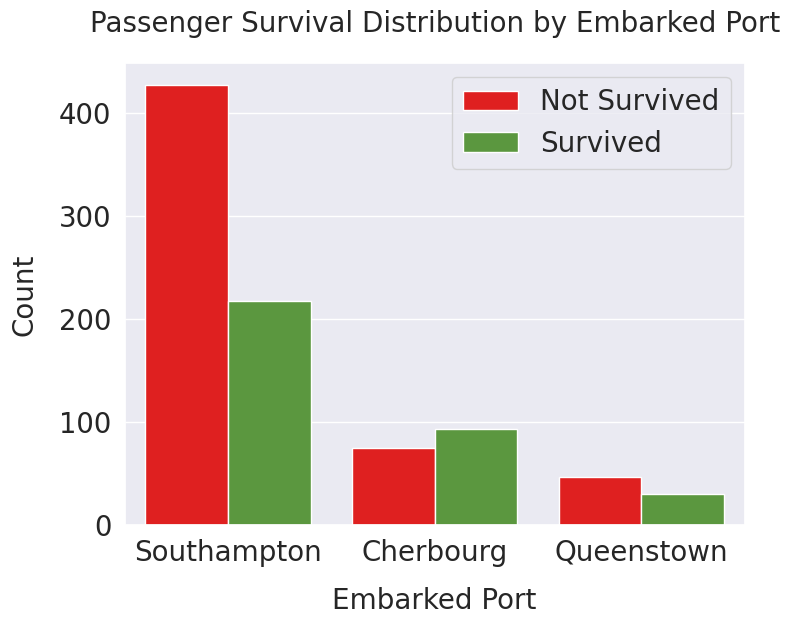

In [24]:
plt.figure(figsize=(8, 6))
# Countplot for Embarked Port
sns.countplot(x='Embarked', hue='Survived', data=train, palette=['red', "#55a630"])
plt.title('Passenger Survival Distribution by Embarked Port', fontsize=f, y=1.05)
plt.xlabel('Embarked Port', fontsize=f, labelpad=15)
plt.ylabel('Count', fontsize=f, labelpad=15)

# Set custom x-axis labels
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize=f)

# Set legend labels
plt.legend(labels=['Not Survived', 'Survived'], fontsize=f)

plt.show()


# Feature Engineering


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
data=[train,test]
titles = {'Mr':1,"Miss":2,'Mrs':3,"Master":4,"other":5}
for dataset in data:
    dataset['name_title'] = dataset['Name'].str.replace('.* ([A-Z][a-z]+)\..*', "\\1", regex=True)
    # Replace titles with a more common title or as Other
    dataset['name_title'] = dataset['name_title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    dataset['name_title'] = dataset['name_title'].replace('Mlle', 'Miss')
    dataset['name_title'] = dataset['name_title'].replace('Ms', 'Miss')
    dataset['name_title'] = dataset['name_title'].replace('Mme', 'Mrs')

    # Convert titles into numbers
    dataset['name_title'] = dataset['name_title'].map(titles)

    # Filling NaN with 0 just to be safe
    dataset['name_title'] = dataset['name_title'].fillna(0)

In [30]:
#Drop Passenger ID
train = train.drop(['PassengerId'],axis=1)
test = test.drop(['PassengerId'],axis=1)
# Drop Cabin
train = train.drop(['Cabin'],axis=1)
test = test.drop(['Cabin'],axis=1)
# Drop name column
train = train.drop(['Name'], axis=1)
test = test.drop(['Name'], axis=1)
# Drop Ticket
train = train.drop(['Ticket'],axis = 1)
test = test.drop(['Ticket'],axis = 1)

In [31]:
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [32]:
data = [train, test]
for dataset in data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [33]:
#converting categorical to numerical variables
ports = {'S':0 , 'C':1, 'Q':2}
data = [train, test]
for dataset in data:
  dataset['Embarked']= dataset['Embarked'].map(ports)
train['Embarked'].isnull().sum()

0

In [34]:
genders = {'male':1,'female':0}
data = [train , test]
for dataset in data:
  dataset['Sex'] = dataset['Sex'].map(genders)

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    int64  
 8   name_title  891 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


In [36]:
# filling missing values in fare column by mean of fare column in train
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(train["Fare"].mean())
    dataset['Fare'] = dataset['Fare'].astype(int)

In [37]:
import numpy as np

# Create a new column 'HasParch' based on the condition
train['HasParch'] = np.where(train['Parch'] > 0, 1, 0)


In [38]:
# Group by 'name_title' and 'Parch', and calculate median age
median_age_by_title_parch = train.groupby(['name_title', 'HasParch'])['Age'].median()

# Define a function to fill missing ages
def fill_age(row):
    if pd.isnull(row['Age']):
        return median_age_by_title_parch.get((row['name_title'], row['Parch']), train['Age'].median())
    else:
        return row['Age']

# Step 3: Apply the function to fill missing ages
train['Age'] = train.apply(fill_age, axis=1)
test['Age'] = test.apply(fill_age,axis=1)

In [39]:
median_age_by_title_parch

name_title  HasParch
0.0         0           48.5
            1           49.0
1.0         0           29.0
            1           35.0
2.0         0           25.5
            1            9.0
3.0         0           34.5
            1           36.0
4.0         0           12.0
            1            3.0
Name: Age, dtype: float64

In [40]:
train = train.rename(columns={'Pclass': 'Passenger Class'})
train = train.rename(columns={"name_title":'Title'})
test = test.rename(columns={'Pclass': 'Passenger Class'})
test = test.rename(columns={"name_title":'Title'})

In [41]:
X_train = train.drop(["Survived",'HasParch'], axis=1)
Y_train = train["Survived"]
X_test  = test.copy()

In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

# Print score
print(round(acc_log,2,), "%")

83.05 %


In [43]:
from sklearn.metrics import f1_score
Y_pred = logreg.predict(X_train)
f1 = f1_score(Y_train, Y_pred)

# Print the F1 score
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.77


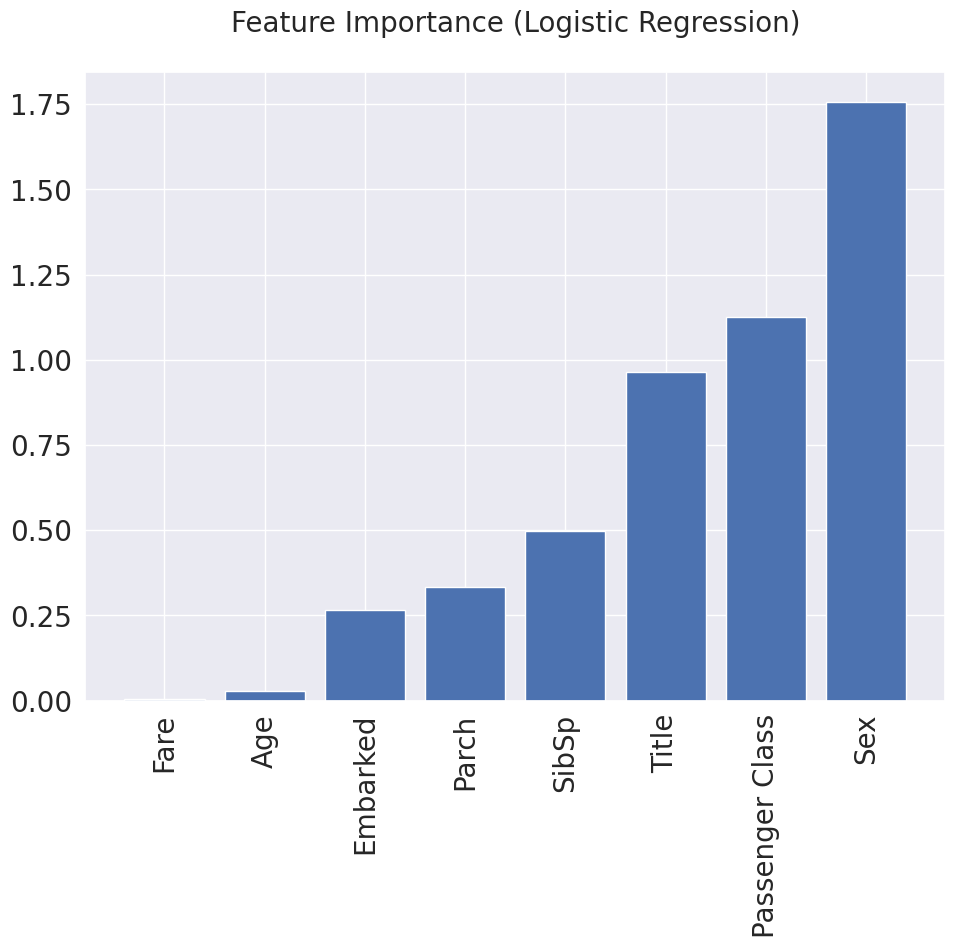

In [44]:
import matplotlib.pyplot as plt

# Get coefficients
coefficients = np.abs(logreg.coef_[0])

# Get feature names
feature_names = X_train.columns

# Sort features by absolute coefficient value
indices = coefficients.argsort()

# Plotting
plt.figure(figsize=(10,10))
plt.title("Feature Importance (Logistic Regression)",fontsize=f,y=1.05)
plt.bar(range(len(coefficients)), coefficients[indices], align='center')
plt.xticks(range(len(coefficients)), [feature_names[i] for i in indices], rotation=90,fontsize=f)
plt.yticks(fontsize=f)
plt.tight_layout()
plt.show()


In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_train,Y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       549
           1       0.80      0.75      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



In [48]:
Y_pred = logreg.predict(X_test)
test['Predicted_Survived'] = Y_pred

# Save the combined data to a CSV file
test.to_csv('combined_test_data.csv', index=False)